PRACTICAL      GROUP 7

MEMBERS:

* Joseph Penlap
* Josue Nguinabe
* Lydie Gaelle
* Nathalie Jadot
* Paule Comfort

**Forecasting using Recurrent Neural** **Networks (RNN)**

In [ ]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
#tf.set_random_seed(1234)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [ ]:
from google.colab import files

import pandas as pd

upload = files.upload()

MessageError: ignored

In [ ]:
df1 = pd.read_csv('wind_solar.csv',skiprows = 15)
df1.head(10)

,YEAR,MO,DY,HR,PS,WS10M,WD10M,WS50M,RH2M,PRECTOTCORR,T2M
0,2020,5,1,0,101.05,2.49,264.79,3.32,90.12,0.08,26.15
1,2020,5,1,1,100.97,2.31,260.06,3.05,90.25,0.12,26.02
2,2020,5,1,2,100.92,2.20,254.14,2.85,90.19,0.19,25.91
3,2020,5,1,3,100.90,2.23,250.36,2.88,90.00,0.19,25.87
4,2020,5,1,4,100.92,2.24,247.20,2.88,90.00,0.15,25.83
5,2020,5,1,5,100.97,2.20,244.98,2.80,90.00,0.11,25.83
6,2020,5,1,6,101.02,2.12,242.87,2.69,89.38,0.08,26.16
7,2020,5,1,7,101.08,2.11,235.55,2.49,86.25,0.07,26.94
8,2020,5,1,8,101.12,2.18,220.49,2.50,80.00,0.06,27.89
9,2020,5,1,9,101.12,2.41,210.23,2.72,74.81,0.05,28.70


In [ ]:
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data

In [ ]:
df1.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'PS', 'WS10M', 'WD10M', 'WS50M', 'RH2M',
       'PRECTOTCORR', 'T2M'],
      dtype='object')

In [ ]:
df =  df1[ ['PS', 'WS10M', 'WD10M', 'WS50M', 'PRECTOTCORR', 'T2M']  ]
df

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,101.05,2.49,264.79,3.32,0.08,26.15
1,100.97,2.31,260.06,3.05,0.12,26.02
2,100.92,2.20,254.14,2.85,0.19,25.91
3,100.90,2.23,250.36,2.88,0.19,25.87
4,100.92,2.24,247.20,2.88,0.15,25.83
...,...,...,...,...,...,...
2203,101.02,3.87,202.53,5.43,0.00,23.66
2204,101.09,3.96,201.30,5.52,0.00,23.57
2205,101.14,3.96,200.44,5.54,0.00,23.50
2206,101.14,3.96,200.19,5.56,0.00,23.46


In [ ]:
df2 = ReScale(df , 0.5)
#df2.drop(['WD10M' , 'PS' ] , axis = 1 , inplace  =  True)
df2.head()

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,0.061791,-0.490478,22.794626,-0.564717,-0.089312,0.077097
1,0.021791,-0.580478,20.429626,-0.699717,-0.069312,0.012097
2,-0.003209,-0.635478,17.469626,-0.799717,-0.034312,-0.042903
3,-0.013209,-0.620478,15.579626,-0.784717,-0.034312,-0.062903
4,-0.003209,-0.615478,13.999626,-0.784717,-0.054312,-0.082903


In [ ]:
df2.columns


Index(['PS', 'WS10M', 'WD10M', 'WS50M', 'PRECTOTCORR', 'T2M'], dtype='object')

In [ ]:
df_new1 = df2[   ['WS10M', 'WD10M']  ]


In [ ]:
df2['PS']

0       0.061791
1       0.021791
2      -0.003209
3      -0.013209
4      -0.003209
          ...   
2203    0.046791
2204    0.081791
2205    0.106791
2206    0.106791
2207    0.086791
Name: PS, Length: 2208, dtype: float64

In [ ]:
df2

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,0.061791,-0.490478,22.794626,-0.564717,-0.089312,0.077097
1,0.021791,-0.580478,20.429626,-0.699717,-0.069312,0.012097
2,-0.003209,-0.635478,17.469626,-0.799717,-0.034312,-0.042903
3,-0.013209,-0.620478,15.579626,-0.784717,-0.034312,-0.062903
4,-0.003209,-0.615478,13.999626,-0.784717,-0.054312,-0.082903
...,...,...,...,...,...,...
2203,0.046791,0.199522,-8.335374,0.490283,-0.129312,-1.167903
2204,0.081791,0.244522,-8.950374,0.535283,-0.129312,-1.212903
2205,0.106791,0.244522,-9.380374,0.545283,-0.129312,-1.247903
2206,0.106791,0.244522,-9.505374,0.555283,-0.129312,-1.267903


In [ ]:
def sliding_windows(data, window_size):#, forecast_over, shift):
    num_batches = len(data) - window_size + 1
    x = []
    for i in range(num_batches):
        _x = data[ i:i+window_size]
        x.append(_x)

    #x.append(data[-window_size:,:])
    return np.array(x)

In [ ]:
time_steps_provider = 12

In [ ]:
framework = sliding_windows(df2, time_steps_provider)[:-1]  #4 here is the loopback
framework

array([[[ 6.17912138e-02, -4.90477808e-01,  2.27946264e+01,
         -5.64716938e-01, -8.93115942e-02,  7.70969203e-02],
        [ 2.17912138e-02, -5.80477808e-01,  2.04296264e+01,
         -6.99716938e-01, -6.93115942e-02,  1.20969203e-02],
        [-3.20878623e-03, -6.35477808e-01,  1.74696264e+01,
         -7.99716938e-01, -3.43115942e-02, -4.29030797e-02],
        ...,
        [ 9.67912138e-02, -5.30477808e-01, -4.48537364e+00,
         -8.64716938e-01, -1.04311594e-01,  1.35209692e+00],
        [ 8.17912138e-02, -4.15477808e-01, -8.93537364e+00,
         -7.49716938e-01, -1.09311594e-01,  1.64709692e+00],
        [ 5.67912138e-02, -2.35477808e-01, -1.39003736e+01,
         -5.59716938e-01, -1.04311594e-01,  1.84709692e+00]],

       [[ 2.17912138e-02, -5.80477808e-01,  2.04296264e+01,
         -6.99716938e-01, -6.93115942e-02,  1.20969203e-02],
        [-3.20878623e-03, -6.35477808e-01,  1.74696264e+01,
         -7.99716938e-01, -3.43115942e-02, -4.29030797e-02],
        [-1.32087

In [ ]:
#
outputs1 = df2['T2M'][time_steps_provider:].values

In [ ]:
output2 = df1['PRECTOTCORR'][time_steps_provider:].values
output2

array([0.08, 0.12, 0.17, ..., 0.  , 0.  , 0.  ])

Our training data

In [ ]:
len(framework)
train_points = int(0.67*len(framework)) #0.75 is the proportion of the trainign set
train_points

1471

In [ ]:
test_points = len(framework) - train_points
test_points

725

In [ ]:
test_points = len(framework) - train_points
test_points

725

In [ ]:
#n_points = len(df_new)
X2_train, X2_test = framework[:train_points] , framework[train_points:]
y2_train, y2_test = outputs1[:train_points],  outputs1[train_points:]

In [ ]:
print(X2_train.shape , X2_test.shape)

(1471, 12, 6) (725, 12, 6)


In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
keras.backend.clear_session()

X2_train = X2_train.reshape(X2_train.shape[0],4, 11)
X2_test = X2_test.reshape(X2_test.shape[0],4, 11)
print(X2_train.shape)
print(X2_test.shape)

ValueError: ignored

In [ ]:
X2_train.shape

(1471, 12, 6)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(X2_train.shape[1], X2_train.shape[2]))) #input_shape takes time steps and features
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100)               10700     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 20

model.fit(X2_train, y2_train, epochs=nb_epoch)

Epoch 1/20
46/46 [==============================] - 2s 18ms/step - loss: 0.3575
Epoch 2/20
46/46 [==============================] - 1s 18ms/step - loss: 0.2022
Epoch 3/20
46/46 [==============================] - 1s 18ms/step - loss: 0.2248
Epoch 4/20
46/46 [==============================] - 1s 18ms/step - loss: 0.1323
Epoch 5/20
46/46 [==============================] - 1s 18ms/step - loss: 0.1243
Epoch 6/20
46/46 [==============================] - 1s 18ms/step - loss: 0.1281
Epoch 7/20
46/46 [==============================] - 1s 19ms/step - loss: 0.1152
Epoch 8/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0633
Epoch 9/20
46/46 [==============================] - 1s 17ms/step - loss: 0.0977
Epoch 10/20
46/46 [==============================] - 1s 18ms/step - loss: 0.0934
Epoch 11/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0646
Epoch 12/20
46/46 [==============================] - 1s 18ms/step - loss: 0.0603
Epoch 13/20
46/46 [==================

In [ ]:
y2_train_pred = model.predict(X2_train)
y2_test_pred = model.predict(X2_test)

In [ ]:
mean_squared_error(y2_train_pred , y2_train)

0.013848310157349645

In [ ]:
mean_squared_error(y2_test_pred , y2_test)

0.031443736693317785

In [ ]:
accuracy_score(y2_test_pred, y2_test)

ValueError: ignored

In [ ]:
y2_train_pred.shape

(1471, 1)

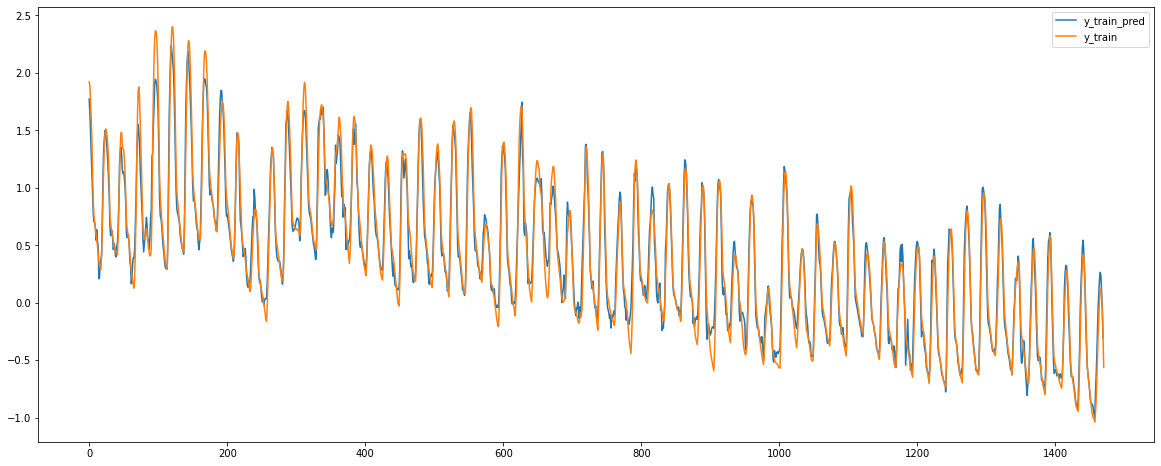

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y2_train_pred[1:] , label ='y_train_pred')
plt.plot(y2_train , label ='y_train')
plt.legend(loc='upper right')

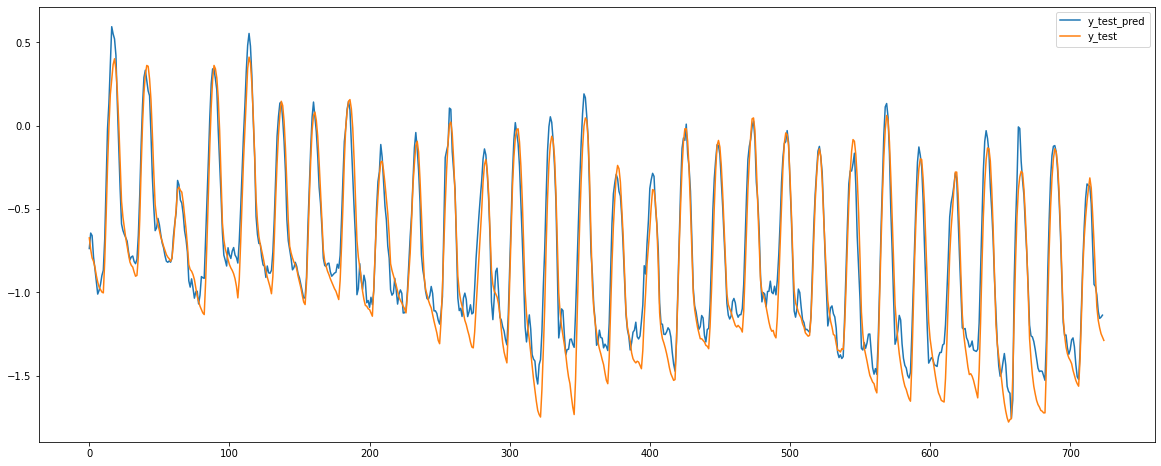

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y2_test_pred[1:] , label ='y_test_pred')
plt.plot(y2_test , label ='y_test')
plt.legend(loc='upper right')

In [ ]:
from keras.layers import LSTM

In [ ]:
model1 = Sequential()
model1.add(LSTM(units=20, input_shape=(X2_train.shape[1], X2_train.shape[2]))) #input_shape takes time steps and features
#model1.add(LSTM(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='sgd')

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                2160      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 50

model1.fit(X2_train, y2_train, epochs=nb_epoch)

Epoch 1/50
46/46 [==============================] - 2s 5ms/step - loss: 0.3811
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.2563
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.2061
Epoch 4/50
46/46 [==============================] - 0s 5ms/step - loss: 0.1869
Epoch 5/50
46/46 [==============================] - 0s 5ms/step - loss: 0.1613
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1454
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1388
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1205
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1159
Epoch 10/50
46/46 [==============================] - 0s 5ms/step - loss: 0.1140
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1077
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 0.1033
Epoch 13/50
46/46 [==============================

In [ ]:
#y_train_pred_LSTM = model.predict(X_train)
#y_test_pred_LSTM = model.predict(X_test)
y2_train_pred_LSTM = model.predict(X2_train)
y2_test_pred_LSTM = model.predict(X2_test)

In [ ]:
mean_squared_error(y2_train_pred_LSTM , y2_train)

0.013848310157349645

In [ ]:
mean_squared_error(y2_test_pred_LSTM , y2_test)

0.0179627462342356

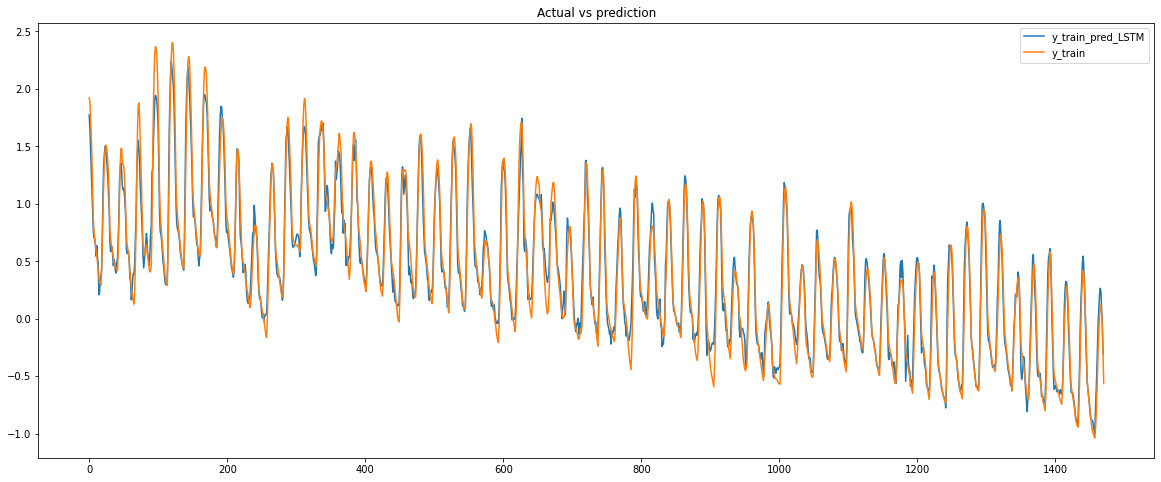

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y2_train_pred_LSTM[1:] , label ='y_train_pred_LSTM')
plt.plot(y2_train , label ='y_train')
plt.title('Actual vs prediction')
plt.legend(loc='upper right')


In [ ]:
import matplotlib.pyplot as plt

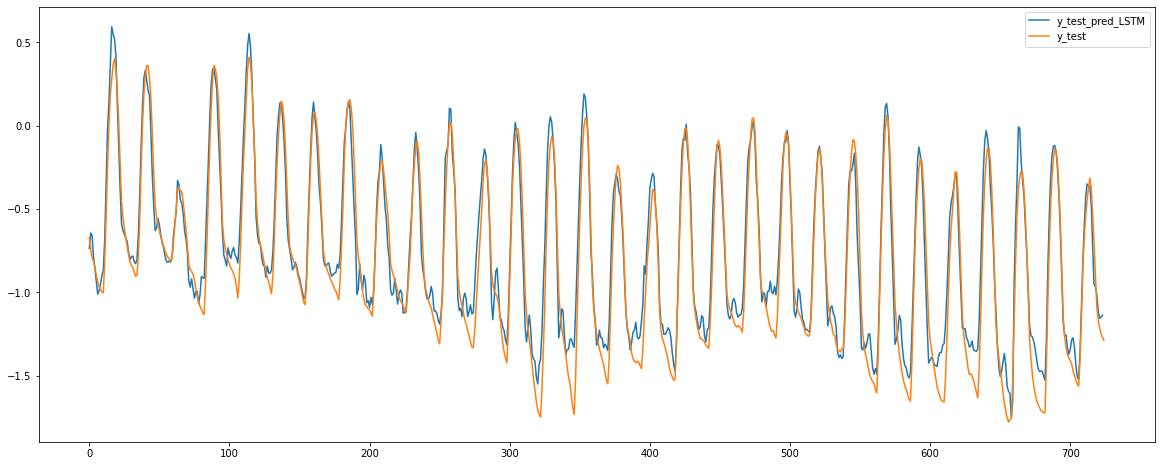

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y2_test_pred_LSTM[1:] , label ='y_test_pred_LSTM')
plt.plot(y2_test , label ='y_test')
plt.legend(loc='upper right')

In [ ]:
df1.head()

,YEAR,MO,DY,HR,PS,WS10M,WD10M,WS50M,RH2M,PRECTOTCORR,T2M
0,2020,5,1,0,101.05,2.49,264.79,3.32,90.12,0.08,26.15
1,2020,5,1,1,100.97,2.31,260.06,3.05,90.25,0.12,26.02
2,2020,5,1,2,100.92,2.20,254.14,2.85,90.19,0.19,25.91
3,2020,5,1,3,100.90,2.23,250.36,2.88,90.00,0.19,25.87
4,2020,5,1,4,100.92,2.24,247.20,2.88,90.00,0.15,25.83


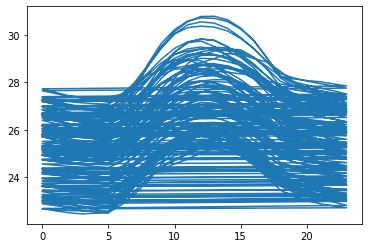

In [ ]:
plt.plot(df1['HR'], df1['T2M'])